# Supermarket Regression Notebook

In [1]:
# reference: https://github.com/risenW/medium_tutorial_notebooks/blob/master/supermarket_regression.ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# makes graph display in notebook
%matplotlib inline

In [2]:
supermarket_data = pd.read_csv('https://raw.githubusercontent.com/risenW/medium_tutorial_notebooks/master/train.csv')

In [3]:
supermarket_data.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [4]:
supermarket_data.describe()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Product_Supermarket_Sales
count,4188.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,12.908838,0.066916,391.803796,2004.783567,6103.520164
std,4.703256,0.053058,119.378259,8.283151,4447.333835
min,4.555000,0.000000,78.730000,1992.000000,83.230000
25%,8.767500,0.027273,307.890000,1994.000000,2757.660000
50%,12.600000,0.053564,393.860000,2006.000000,5374.675000
75%,17.100000,0.095358,465.067500,2011.000000,8522.240000
max,21.350000,0.328391,667.220000,2016.000000,32717.410000


In [5]:
# remove ID columns
cols_2_remove = ['Product_Identifier', 'Supermarket_Identifier', 'Product_Supermarket_Identifier']

newdata = supermarket_data.drop(cols_2_remove, axis=1)

In [6]:
newdata.head()

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [7]:
cat_cols = ['Product_Fat_Content','Product_Type',
            'Supermarket _Size', 'Supermarket_Location_Type',
           'Supermarket_Type' ]

num_cols = ['Product_Weight', 'Product_Shelf_Visibility',
            'Product_Price', 'Supermarket_Opening_Year', 'Product_Supermarket_Sales']

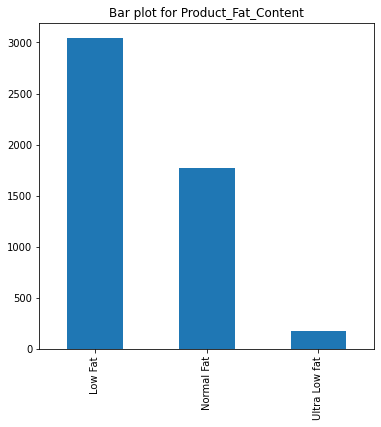

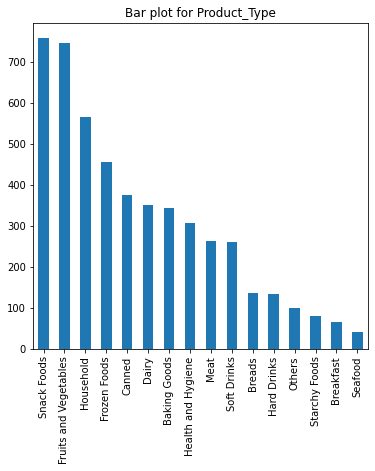

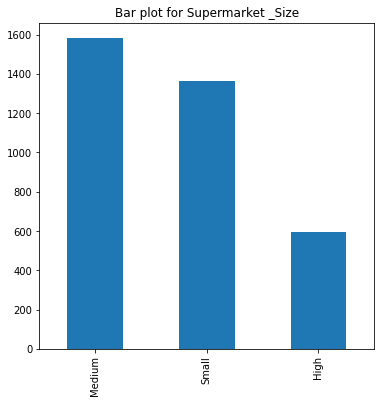

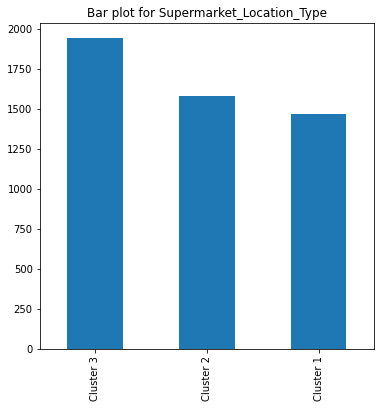

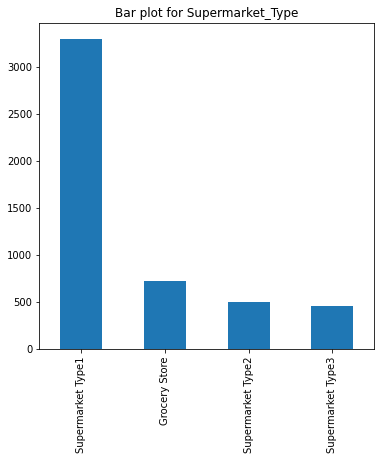

In [8]:
# bar plot for categorial features
for col in cat_cols:
    fig = plt.figure(figsize=(6,6)) # define plot area
    ax = fig.gca() # define axis  
    
    counts = newdata[col].value_counts() # find the counts for each unique category
    counts.plot.bar(ax = ax) # use the plot.bar method on the counts data frame
    ax.set_title('Bar plot for ' + col)

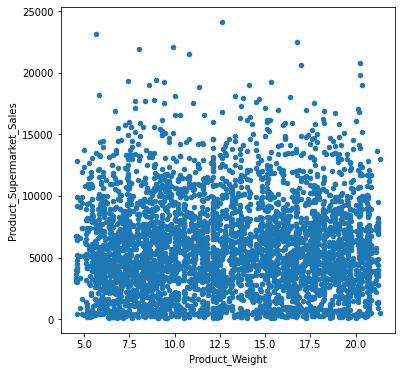

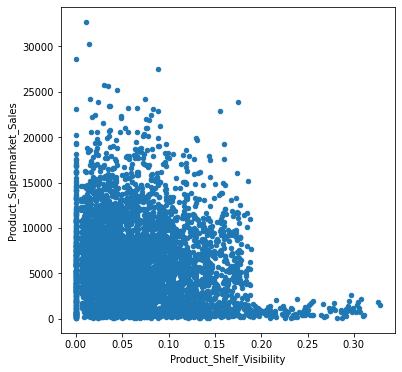

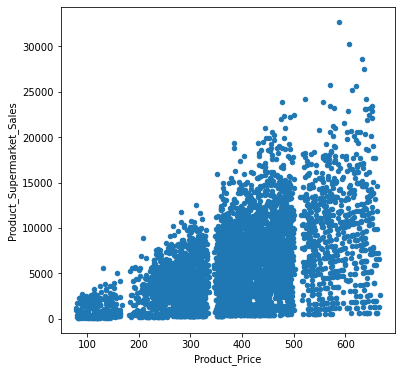

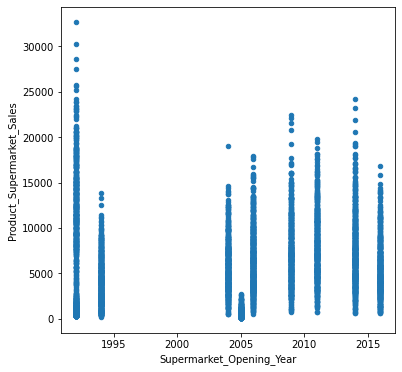

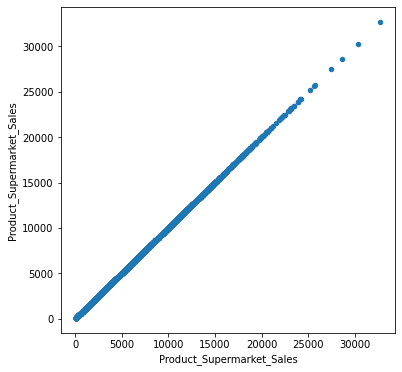

In [9]:
# scatter plot for numerical features
for col in num_cols:
    fig = plt.figure(figsize=(6,6)) # define plot area
    ax = fig.gca() # define axis  

    newdata.plot.scatter(x = col, y = 'Product_Supermarket_Sales', ax = ax)


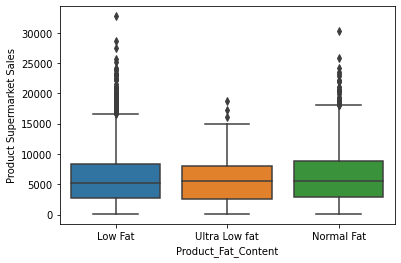

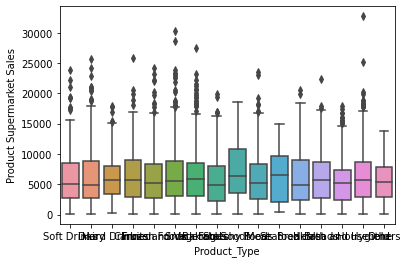

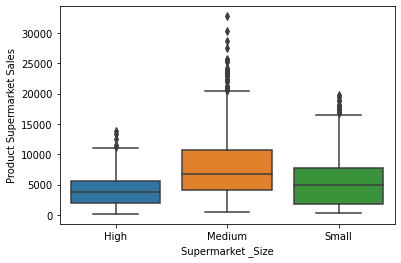

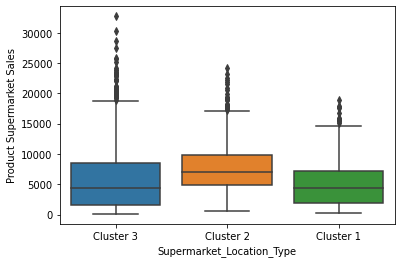

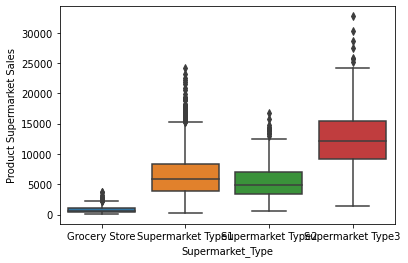

In [10]:
# box plot for categorial features
for col in cat_cols:
    sns.boxplot(x=col, y='Product_Supermarket_Sales', data=newdata)
    plt.xlabel(col)
    plt.ylabel('Product Supermarket Sales')
    plt.show() 

<AxesSubplot:>

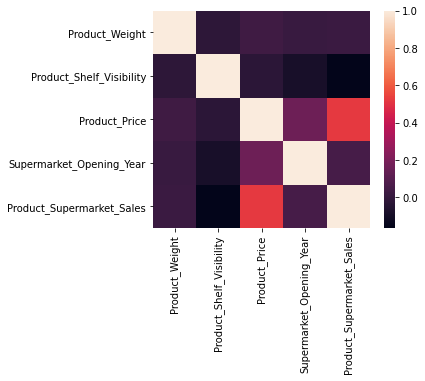

In [11]:
# correlation matrix
corrmat = newdata.corr()
f,ax = plt.subplots(figsize=(5,4))
sns.heatmap(corrmat, square=True)

<Figure size 432x288 with 0 Axes>

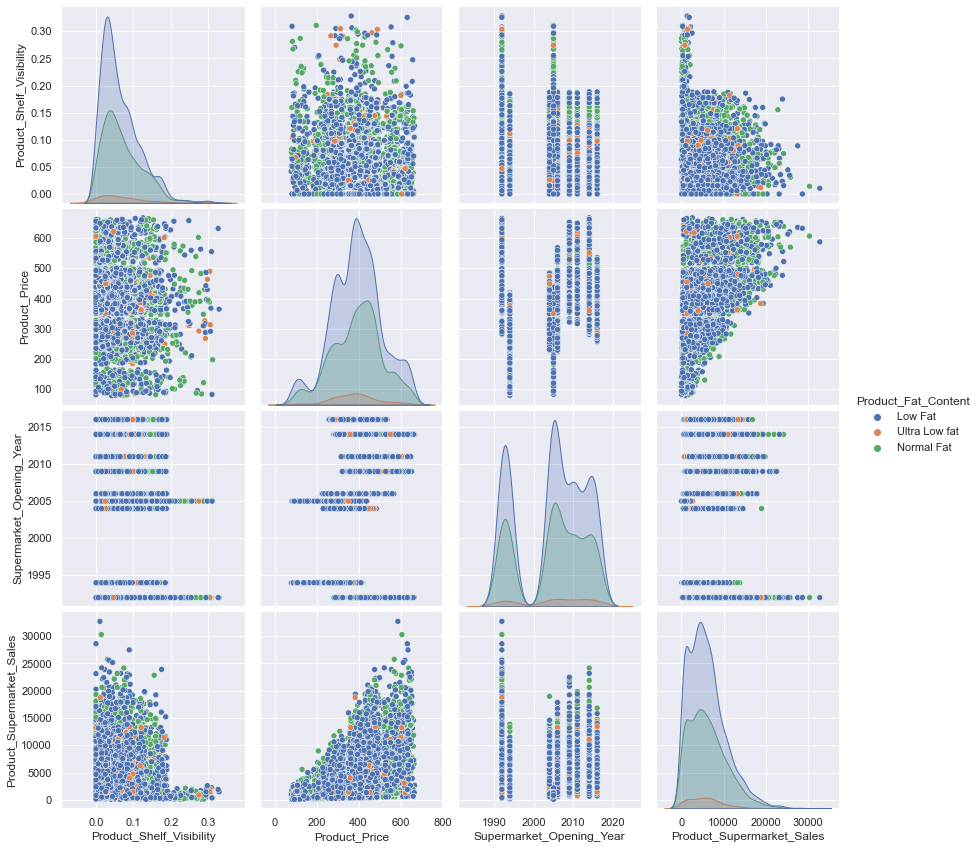

<Figure size 432x288 with 0 Axes>

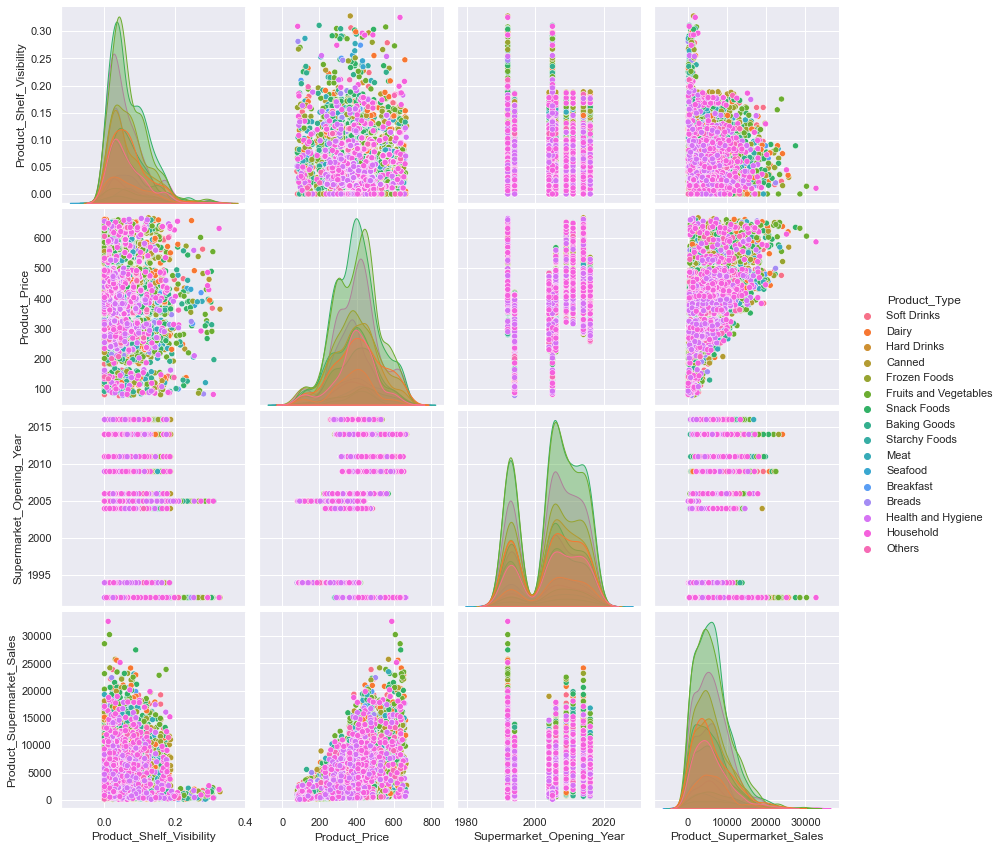

<Figure size 432x288 with 0 Axes>

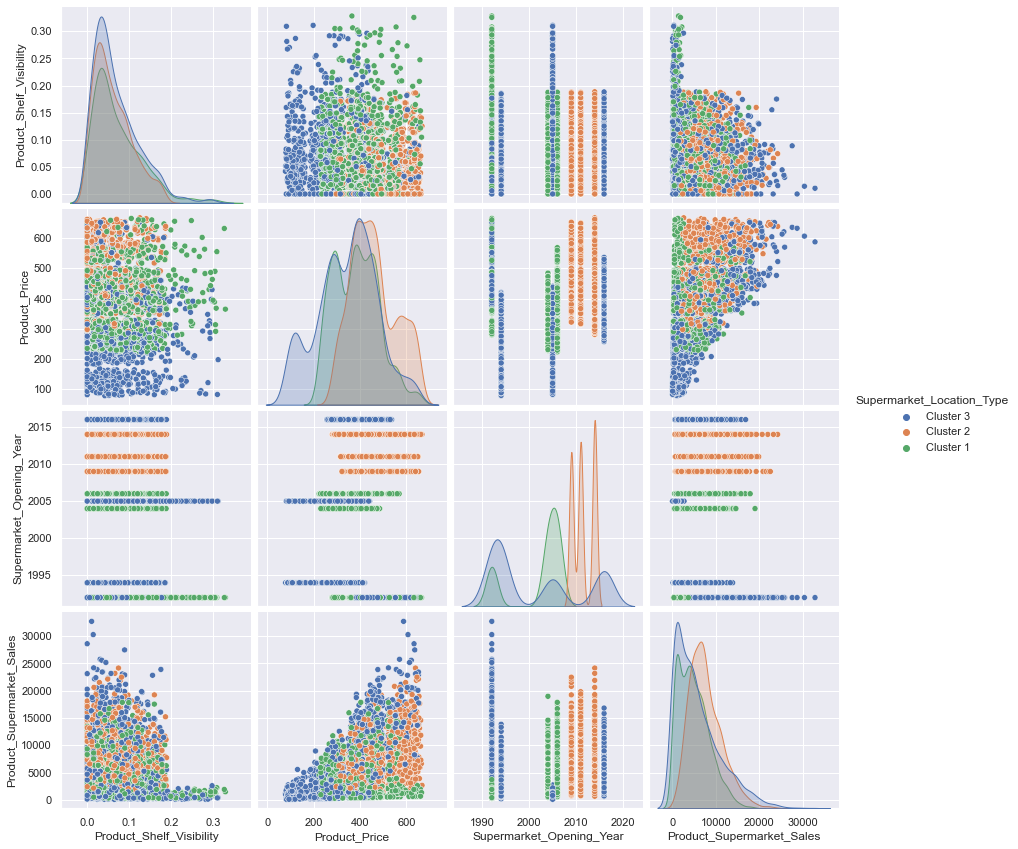

In [12]:
# pair plot of columns without missing values
import warnings
warnings.filterwarnings('ignore')

cat_cols_pair = ['Product_Fat_Content','Product_Type','Supermarket_Location_Type']

cols_2_pair = ['Product_Fat_Content',
             'Product_Shelf_Visibility',
             'Product_Type',
             'Product_Price',
             'Supermarket_Opening_Year',
             'Supermarket_Location_Type',
             'Supermarket_Type',
             'Product_Supermarket_Sales']

for col in cat_cols_pair:
    sns.set()
    plt.figure()
    sns.pairplot(data=newdata[cols_2_pair], height=3.0, hue=col)
    plt.show()

In [13]:
# FEATURE ENGINEERING
# print all unique values
newdata['Product_Fat_Content'].unique()

array(['Low Fat', 'Ultra Low fat', 'Normal Fat'], dtype=object)

In [14]:
fat_content_dict = {'Low Fat': 0, 'Ultra Low fat': 0, 'Normal Fat': 1}
newdata['is_normal_fat'] = newdata['Product_Fat_Content'].map(fat_content_dict)

# preview the values
newdata['is_normal_fat'].value_counts()

0    3217
1    1773
Name: is_normal_fat, dtype: int64

In [15]:
# assign year 2000 and above as 1, 1996 and below as 0
def cluster_open_year(year):
    if year <= 1996:
        return 0
    else:
        return 1
    
newdata['open_in_the_2000s'] = newdata['Supermarket_Opening_Year'].apply(cluster_open_year)

In [16]:
# preview feature
newdata[['Supermarket_Opening_Year', 'open_in_the_2000s']].head(4)

,Supermarket_Opening_Year,open_in_the_2000s
0,2005,1
1,1994,0
2,2014,1
3,2016,1


In [17]:
# get the unique categories in the column as a list
prod_type_cats = list(newdata['Product_Type'].unique())

# remove the class 1 categories
prod_type_cats.remove('Health and Hygiene')
prod_type_cats.remove('Household')
prod_type_cats.remove('Others')

def cluster_prod_type(product):
    if product in prod_type_cats:
        return 0
    else:
        return 1
    
newdata['Product_type_cluster'] = newdata['Product_Type'].apply(cluster_prod_type)

In [18]:
newdata[['Product_Type', 'Product_type_cluster']].tail(10)

,Product_Type,Product_type_cluster
4980,Health and Hygiene,1
4981,Health and Hygiene,1
4982,Health and Hygiene,1
4983,Household,1
4984,Household,1
4985,Household,1
4986,Household,1
4987,Household,1
4988,Household,1
4989,Household,1


Text(0.5, 1.0, 'Transformation of Product_Supermarket_Sales feature')

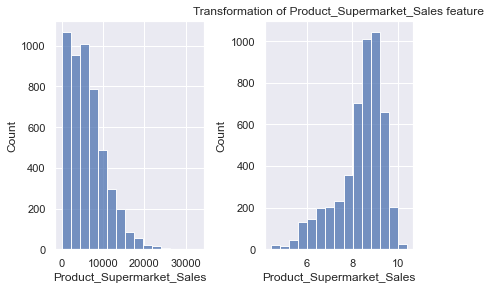

In [19]:
# transforming skewed features
fig, ax = plt.subplots(1,2)

# plot of normal Product_Supermarket_Sales on the first axis
sns.histplot(data=newdata['Product_Supermarket_Sales'], bins=15, ax=ax[0])

# transform the Product_Supermarket_Sales and plot on the second axis
newdata['Product_Supermarket_Sales'] = np.log1p(newdata['Product_Supermarket_Sales'])
sns.histplot(data=newdata['Product_Supermarket_Sales'], bins=15, ax=ax[1])

plt.tight_layout()
plt.title("Transformation of Product_Supermarket_Sales feature")

Text(0.5, 1.0, 'Transformation of Product_Shelf_Visibility feature')

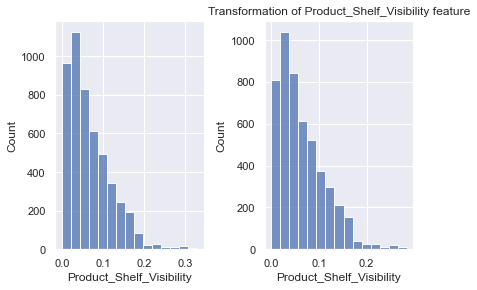

In [20]:
# next, let's transform Product_Shelf_Visibility
fig, ax = plt.subplots(1,2)

# plot of normal Product_Supermarket_Sales on the first axis
sns.histplot(data=newdata['Product_Shelf_Visibility'], bins=15, ax=ax[0])

# transform the Product_Supermarket_Sales and plot on the second axis
newdata['Product_Shelf_Visibility'] = np.log1p(newdata['Product_Shelf_Visibility'])
sns.histplot(data=newdata['Product_Shelf_Visibility'], bins=15, ax=ax[1])

plt.tight_layout()
plt.title("Transformation of Product_Shelf_Visibility feature")

In [21]:
# feature encoding
for col in cat_cols:
    print('Value Count for', col)
    print(newdata[col].value_counts())
    print("---------------------------")

Value Count for Product_Fat_Content
Low Fat          3039
Normal Fat       1773
Ultra Low fat     178
Name: Product_Fat_Content, dtype: int64
---------------------------
Value Count for Product_Type
Snack Foods              758
Fruits and Vegetables    747
Household                567
Frozen Foods             457
Canned                   376
Dairy                    350
Baking Goods             344
Health and Hygiene       307
Meat                     264
Soft Drinks              261
Breads                   137
Hard Drinks              134
Others                   100
Starchy Foods             81
Breakfast                 66
Seafood                   41
Name: Product_Type, dtype: int64
---------------------------
Value Count for Supermarket _Size
Medium    1582
Small     1364
High       594
Name: Supermarket _Size, dtype: int64
---------------------------
Value Count for Supermarket_Location_Type
Cluster 3    1940
Cluster 2    1581
Cluster 1    1469
Name: Supermarket_Location_Type, dt

In [22]:
# save the target value to a new variable
y_target = newdata['Product_Supermarket_Sales']
newdata.drop(['Product_Supermarket_Sales'], axis=1, inplace=True)

# one hot encode using pandas dummy() function
dummified_data = pd.get_dummies(newdata)
dummified_data.head()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,is_normal_fat,open_in_the_2000s,Product_type_cluster,Product_Fat_Content_Low Fat,Product_Fat_Content_Normal Fat,Product_Fat_Content_Ultra Low fat,...,Supermarket _Size_High,Supermarket _Size_Medium,Supermarket _Size_Small,Supermarket_Location_Type_Cluster 1,Supermarket_Location_Type_Cluster 2,Supermarket_Location_Type_Cluster 3,Supermarket_Type_Grocery Store,Supermarket_Type_Supermarket Type1,Supermarket_Type_Supermarket Type2,Supermarket_Type_Supermarket Type3
0,11.6,0.066289,357.54,2005,0,1,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
1,11.6,0.040097,355.79,1994,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
2,11.6,0.040352,350.79,2014,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,11.6,0.040290,355.04,2016,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
4,11.6,0.000000,354.79,2011,0,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0


In [23]:
# fill-in missing values
# print null columns
dummified_data.isnull().sum()

Product_Weight                         802
Product_Shelf_Visibility                 0
Product_Price                            0
Supermarket_Opening_Year                 0
is_normal_fat                            0
open_in_the_2000s                        0
Product_type_cluster                     0
Product_Fat_Content_Low Fat              0
Product_Fat_Content_Normal Fat           0
Product_Fat_Content_Ultra Low fat        0
Product_Type_Baking Goods                0
Product_Type_Breads                      0
Product_Type_Breakfast                   0
Product_Type_Canned                      0
Product_Type_Dairy                       0
Product_Type_Frozen Foods                0
Product_Type_Fruits and Vegetables       0
Product_Type_Hard Drinks                 0
Product_Type_Health and Hygiene          0
Product_Type_Household                   0
Product_Type_Meat                        0
Product_Type_Others                      0
Product_Type_Seafood                     0
Product_Typ

In [24]:
# compute the mean
mean_pw = dummified_data['Product_Weight'].mean()

# fill the missing values with calculated mean
dummified_data['Product_Weight'].fillna(mean_pw, inplace=True)

In [25]:
# check if filling is successful
dummified_data.isnull().sum()

Product_Weight                         0
Product_Shelf_Visibility               0
Product_Price                          0
Supermarket_Opening_Year               0
is_normal_fat                          0
open_in_the_2000s                      0
Product_type_cluster                   0
Product_Fat_Content_Low Fat            0
Product_Fat_Content_Normal Fat         0
Product_Fat_Content_Ultra Low fat      0
Product_Type_Baking Goods              0
Product_Type_Breads                    0
Product_Type_Breakfast                 0
Product_Type_Canned                    0
Product_Type_Dairy                     0
Product_Type_Frozen Foods              0
Product_Type_Fruits and Vegetables     0
Product_Type_Hard Drinks               0
Product_Type_Health and Hygiene        0
Product_Type_Household                 0
Product_Type_Meat                      0
Product_Type_Others                    0
Product_Type_Seafood                   0
Product_Type_Snack Foods               0
Product_Type_Sof

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dummified_data, y_target, test_size = 0.3)

print("Training data is", X_train.shape)
print("Training target is", y_train.shape)
print("test data is", X_test.shape)
print("test target is", y_test.shape)

Training data is (3493, 36)
Training target is (3493,)
test data is (1497, 36)
test target is (1497,)


In [27]:
from sklearn.preprocessing import RobustScaler, StandardScaler
scaler = RobustScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

X_train[:5, :5]

array([[ 1.11222151,  0.77329048, -0.10167541, -0.05882353,  1.        ],
       [ 1.03420733,  0.64446093,  0.29696892,  0.58823529,  1.        ],
       [ 1.10512931, -0.19777034, -0.09898964,  0.        ,  0.        ],
       [-0.94948062, -0.03939268,  1.10116383,  0.47058824,  1.        ],
       [ 0.        ,  0.5364253 ,  0.00690625, -0.82352941,  0.        ]])

In [28]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score


def cross_validate(model, nfolds, feats, targets):
    score = -1 * (cross_val_score(model, feats, targets, cv=nfolds, scoring='neg_mean_absolute_error'))
    return np.mean(score)

In [29]:
n_estimators=150
max_depth=3
max_features='sqrt'
min_samples_split=4
random_state=2

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features, min_samples_split=min_samples_split, random_state=random_state)

mae_score = cross_validate(gb_model, 10, X_train, y_train)
print("MAE Score: ", mae_score)

MAE Score:  0.4078268922230158


In [31]:
from flytekitplugins.papermill import record_outputs
record_outputs(mae_score=float(mae_score))

literals {
  key: "mae_score"
  value {
    scalar {
      primitive {
        float_value: 0.4078268922230158
      }
    }
  }
}